In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# import dataframe_image as dfi
import seaborn as sns

In [56]:
root = 'D:/1- Estudos/USP/Mestrado/2022-01/2- Processamento Paralelo/EP2/src/results/'
results = "triple_spiral.csv"

data = pd.read_csv(root+results,names=["File","Tamanho","Num Processos","Num Threads","Seg","mSeg"])
data['Tempo'] = data['Seg'].astype(str) + "." +  data['mSeg'].astype(str)
data['Tempo'] = data['Tempo'].apply(float)

In [99]:
df_seq = data.loc[data['File']=='mandelbrot_seq ',['Num Processos','Num Threads','Tempo']]
df_omp = data.loc[data['File']=='mandelbrot_omp ',['Num Processos','Num Threads','Tempo']]
df_pth = data.loc[data['File']=='mandelbrot_pth ',['Num Processos','Num Threads','Tempo']]

df_mpi_seq = data.loc[data['File']=='mandelbrot_ompi_seq ',['Num Processos','Num Threads','Tempo']]
df_mpi_omp = data.loc[data['File']=='mandelbrot_ompi_omp ',['Num Processos','Num Threads','Tempo']]
df_mpi_pth = data.loc[data['File']=='mandelbrot_ompi_pth ',['Num Processos','Num Threads','Tempo']]

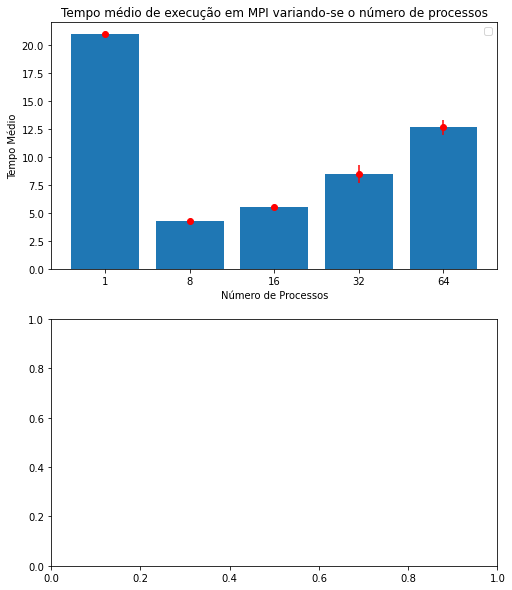

In [158]:
this_data = df_mpi_seq.copy()
df_mean = this_data[['Num Processos', 'Tempo']].groupby(by=['Num Processos']).mean()
df_var = this_data[['Num Processos', 'Tempo']].groupby(by=['Num Processos']).var()

fig, axes = plt.subplots(2,1,figsize=(8,10))
axes[0].bar(x=df_mean.index.astype(str),height=df_mean['Tempo'].values.flatten())
axes[0].errorbar(x=df_mean.index.astype(str), 
                            y=df_mean['Tempo'].values.flatten(),
                            yerr=df_var['Tempo'].values.flatten(),fmt='o',color='red')

axes[0].legend([])
axes[0].set_xlabel('Número de Processos')
axes[0].set_ylabel('Tempo Médio')
axes[0].set_title('Tempo médio de execução em MPI variando-se o número de processos')

plt.savefig('ompi_seq')
plt.show()

In [155]:
this_data = df_mpi_pth.copy()
df_mean = this_data[['Num Processos', 'Tempo']].groupby(by=['Num Processos']).mean()
df_var = this_data[['Num Processos', 'Tempo']].groupby(by=['Num Processos']).var()

fig, axes = plt.subplots(2,1,figsize=(8,10))
axes[0].bar(x=df_mean.index.astype(str),height=df_mean['Tempo'].values.flatten())
axes[0].errorbar(x=df_mean.index.astype(str), 
                            y=df_mean['Tempo'].values.flatten(),
                            yerr=df_var['Tempo'].values.flatten(),fmt='o',color='red')

axes[0].legend([])
axes[0].set_xlabel('Número de Processos')
axes[0].set_ylabel('Tempo Médio')
axes[0].set_title('Tempo médio de execução em MPI variando-se o número de processos')

plt.savefig('ompi_seq')
plt.show()

Index(['1', '8', '16', '32', '64'], dtype='object', name='Num Processos')

<ErrorbarContainer object of 3 artists>

In [94]:
df_mpi_seq

,Tamanho,Num Processos,Num Threads,Tempo
195,4096,1,1,20.988
196,4096,1,1,20.964
197,4096,1,1,20.972
198,4096,1,1,20.967
199,4096,1,1,20.965
...,...,...,...,...
265,4096,64,1,12.559
266,4096,64,1,11.677
267,4096,64,1,13.900
268,4096,64,1,12.960


KeyError: 'triple_spiral'

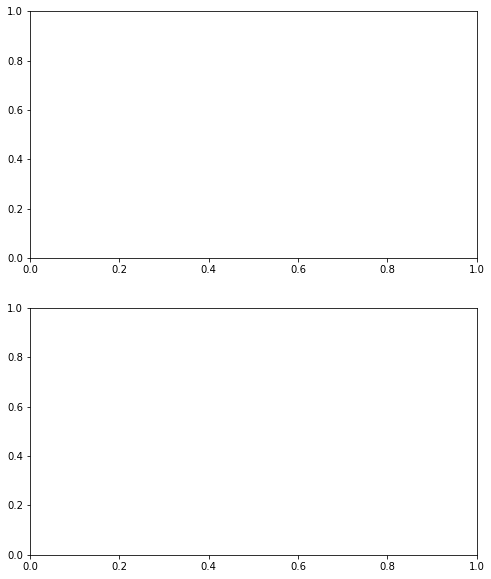

In [55]:
fig, axes = plt.subplots(2,1,figsize=(8,10))
# primeiro plot
a = df.loc[(slice(None),8192),'triple_spiral'].reset_index(level='Tamanho')
b = df.loc[(slice(None),4096),'triple_spiral'].reset_index(level='Tamanho')
c = df.loc[(slice(None),2048),'triple_spiral'].reset_index(level='Tamanho')
d = df.loc[(slice(None),512),'triple_spiral'].reset_index(level='Tamanho')
e = df.loc[(slice(None),128),'triple_spiral'].reset_index(level='Tamanho')
f = df.loc[(slice(None),32),'triple_spiral'].reset_index(level='Tamanho')

ax = a.plot(ax=axes[0],y=['triple_spiral'])
ax = b.plot(ax=axes[0],y=['triple_spiral'])
ax = c.plot(ax=axes[0],y=['triple_spiral'])
ax.legend(['L = 8192','L = 4096', 'L = 2048'])
ax.set_xlabel('Num Threads')
ax.set_ylabel('Tempo de Execução [s]')
ax.set_title('OMP - Triple Spiral')

# segundo plot
a = a/a.loc[1,'triple_spiral']*100
b = b/b.loc[1,'triple_spiral']*100
c = c/c.loc[1,'triple_spiral']*100
d = d/d.loc[1,'triple_spiral']*100
e = e/e.loc[1,'triple_spiral']*100
f = f/f.loc[1,'triple_spiral']*100

ax = a.plot(ax=axes[1],y=['triple_spiral'])
ax = b.plot(ax=axes[1],y=['triple_spiral'])
ax = c.plot(ax=axes[1],y=['triple_spiral'])
ax = d.plot(ax=axes[1],y=['triple_spiral'])
ax = e.plot(ax=axes[1],y=['triple_spiral'])
ax = f.plot(ax=axes[1],y=['triple_spiral'])
ax.legend(['L = 8192','L = 4096', 'L = 2048', 'L = 512', 'L = 128', 'L = 32' ])
ax.set_xlabel('Num Threads')
ax.set_ylabel('Tempo de Execução (%)')
ax.set_title('OMP - Triple Spiral (tempo %)')
fig.tight_layout()
plt.savefig('OMP_triple spiral')

In [59]:
omp_data = data
df = omp_data.groupby(by=['Num Threads','Tamanho','File']).mean().reset_index(level=2)
df = df.pivot_table(values='Tempo',columns='File',index=['Num Threads','Tamanho'])
df = df.round(decimals=4)
df.to_csv("omp_res.csv",sep=';',decimal=',')

df_var = omp_data.groupby(by=['Num Threads','Num Processos','File']).var().reset_index(level=2)
df_var = df_var.pivot_table(values='Tempo',columns='File',index=['Num Threads','Num Processos'])
df_var = df_var.round(decimals=4)
df_var.to_csv("omp_var.csv",sep=';',decimal=',')
df_omp = df.copy()
df_omp_var = df_var.copy()

In [2]:
root = "/media/lfdolabela/Dados/1- Estudos/USP/Mestrado/2022-01/2- Processamento Paralelo/EP1/mac0219-tests/results/"
omp_folder = "mandelbrot_omp/"
pth_folder = "mandelbrot_pth/"
seq_folder = "mandelbrot_seq/"
elephant = "elephant"
full = "full"
seahorse = "seahorse"
triple = "triple_spiral"
sem_io = "_sem_io"

files = [elephant,full,seahorse,triple]

try: 
    del omp_data
except:
    pass
folder = omp_folder
for file in files:
    data = pd.read_csv(root+folder+file+".csv",names=["Num Threads","Tamanho","Tempo"])
    data['File'] = file
    try: 
        omp_data = omp_data.append(data)
    except:
        omp_data = data
        
try: 
    del pth_data
except:
    pass
folder = pth_folder
for file in files:
    data = pd.read_csv(root+folder+file+".csv",names=["Num Threads","Tamanho","Tempo"])
    data['File'] = file
    try: 
        pth_data = pth_data.append(data)
    except:
        pth_data = data
        
try: 
    del seq_data
except:
    pass
folder = seq_folder
for file in files:
    data = pd.read_csv(root+folder+file+".csv",names=["Num Threads","Tamanho","Tempo"])
    data['File'] = file
    try: 
        seq_data = seq_data.append(data)
    except:
        seq_data = data      
        
try: 
    del seq_sem_io_data
except:
    pass
folder = seq_folder
for file in files:
    data = pd.read_csv(root+folder+file+sem_io+".csv",names=["Num Threads","Tamanho","Tempo"])
    data['File'] = file
    try: 
        seq_sem_io_data = seq_sem_io_data.append(data)
    except:
        seq_sem_io_data = data     

<ErrorbarContainer object of 3 artists>

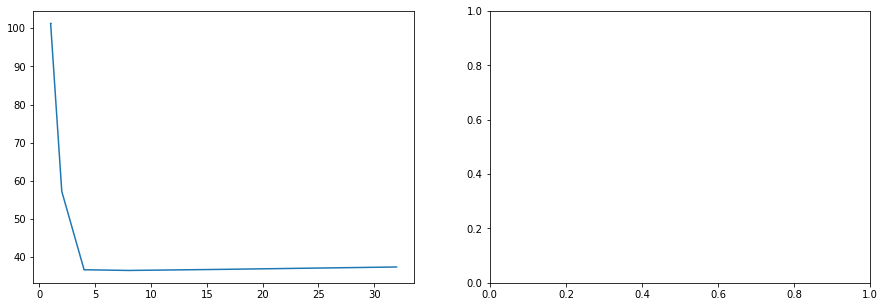

In [4]:
fig, axes = plt.subplots(1,2,figsize=(15,5))
df_to_plot_mean = df.loc[(slice(None),8192),'triple_spiral'].reset_index(level='Tamanho')
df_to_plot_var = df_var.loc[(slice(None),8192),'triple_spiral'].reset_index(level='Tamanho')
axis_to_plot = 0
axes[axis_to_plot].errorbar(x=df_to_plot_mean.index, 
                            y=df_to_plot_mean['triple_spiral'].values.flatten(),
                            yerr=df_to_plot_var['triple_spiral'].values.flatten())



In [6]:
df = pth_data.groupby(by=['Num Threads','Tamanho','File']).mean().reset_index(level=2)
df = df.pivot_table(values='Tempo',columns='File',index=['Num Threads','Tamanho'])
df = df.round(decimals=4)
df.to_csv("pth_res.csv",sep=';',decimal=',')

df_var = pth_data.groupby(by=['Num Threads','Tamanho','File']).var().reset_index(level=2)
df_var = df_var.pivot_table(values='Tempo',columns='File',index=['Num Threads','Tamanho'])
df_var = df_var.round(decimals=4)
df_var.to_csv("pth_var.csv",sep=';',decimal=',')
df_pth = df.copy()
df_pth_var = df_var.copy()

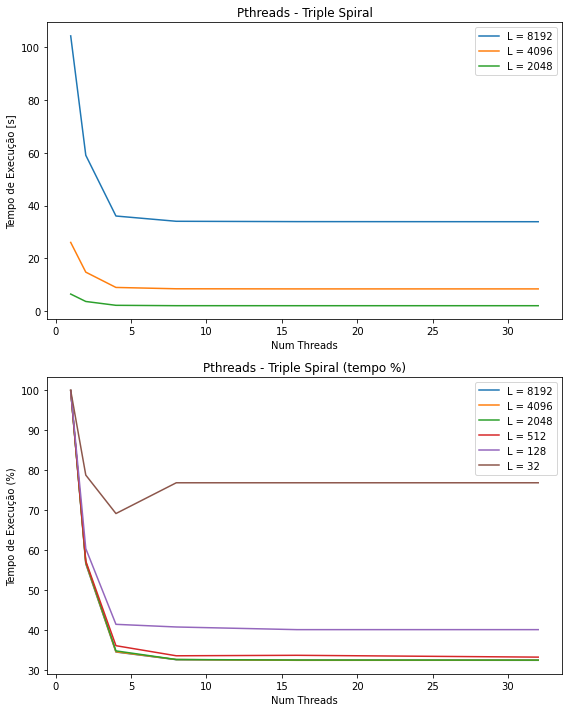

In [7]:
fig, axes = plt.subplots(2,1,figsize=(8,10))
df = df_pth
# primeiro plot
a = df.loc[(slice(None),8192),'triple_spiral'].reset_index(level='Tamanho')
b = df.loc[(slice(None),4096),'triple_spiral'].reset_index(level='Tamanho')
c = df.loc[(slice(None),2048),'triple_spiral'].reset_index(level='Tamanho')
d = df.loc[(slice(None),512),'triple_spiral'].reset_index(level='Tamanho')
e = df.loc[(slice(None),128),'triple_spiral'].reset_index(level='Tamanho')
f = df.loc[(slice(None),32),'triple_spiral'].reset_index(level='Tamanho')

ax = a.plot(ax=axes[0],y=['triple_spiral'])
ax = b.plot(ax=axes[0],y=['triple_spiral'])
ax = c.plot(ax=axes[0],y=['triple_spiral'])
ax.legend(['L = 8192','L = 4096', 'L = 2048'])
ax.set_xlabel('Num Threads')
ax.set_ylabel('Tempo de Execução [s]')
ax.set_title('Pthreads - Triple Spiral')

# segundo plot
a = a/a.loc[1,'triple_spiral']*100
b = b/b.loc[1,'triple_spiral']*100
c = c/c.loc[1,'triple_spiral']*100
d = d/d.loc[1,'triple_spiral']*100
e = e/e.loc[1,'triple_spiral']*100
f = f/f.loc[1,'triple_spiral']*100

ax = a.plot(ax=axes[1],y=['triple_spiral'])
ax = b.plot(ax=axes[1],y=['triple_spiral'])
ax = c.plot(ax=axes[1],y=['triple_spiral'])
ax = d.plot(ax=axes[1],y=['triple_spiral'])
ax = e.plot(ax=axes[1],y=['triple_spiral'])
ax = f.plot(ax=axes[1],y=['triple_spiral'])
ax.legend(['L = 8192','L = 4096', 'L = 2048', 'L = 512', 'L = 128', 'L = 32' ])
ax.set_xlabel('Num Threads')
ax.set_ylabel('Tempo de Execução (%)')
ax.set_title('Pthreads - Triple Spiral (tempo %)')
fig.tight_layout()
plt.savefig('PTH_triple spiral')

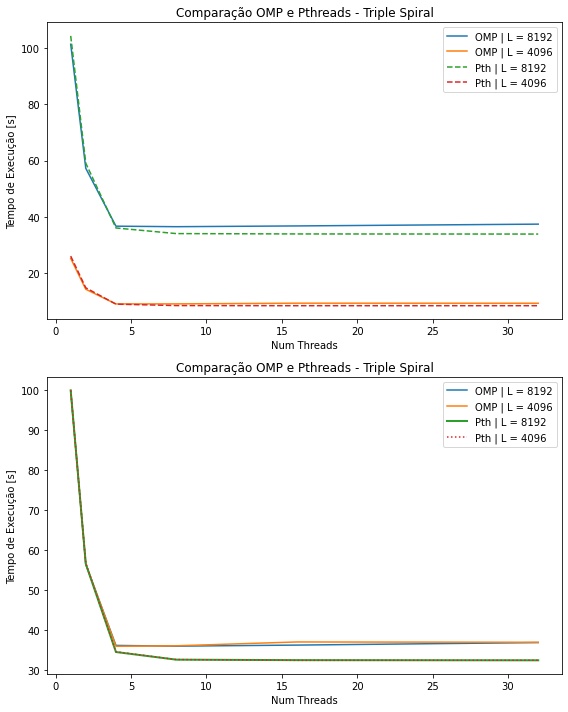

In [8]:
fig, axes = plt.subplots(2,1,figsize=(8,10))
df1 = df_omp
df1_var = df_omp_var
df2 = df_pth
df2_var = df_pth_var
# primeiro plot
a = df1.loc[(slice(None),8192),'triple_spiral'].reset_index(level='Tamanho')
b = df1.loc[(slice(None),4096),'triple_spiral'].reset_index(level='Tamanho')
c = df2.loc[(slice(None),8192),'triple_spiral'].reset_index(level='Tamanho')
d = df2.loc[(slice(None),4096),'triple_spiral'].reset_index(level='Tamanho')


ax = a.plot(ax=axes[0],y=['triple_spiral'])
ax = b.plot(ax=axes[0],y=['triple_spiral'])
ax = c.plot(ax=axes[0],y=['triple_spiral'], linestyle='--')
ax = d.plot(ax=axes[0],y=['triple_spiral'], linestyle='--')
ax.legend(['OMP | L = 8192','OMP | L = 4096', 'Pth | L = 8192', 'Pth | L = 4096'])
ax.set_xlabel('Num Threads')
ax.set_ylabel('Tempo de Execução [s]')
ax.set_title('Comparação OMP e Pthreads - Triple Spiral')

# segundo plot
a = a/a.loc[1,'triple_spiral']*100
b = b/b.loc[1,'triple_spiral']*100
c = c/c.loc[1,'triple_spiral']*100
d = d/d.loc[1,'triple_spiral']*100

ax = a.plot(ax=axes[1],y=['triple_spiral'])
ax = b.plot(ax=axes[1],y=['triple_spiral'])
ax = c.plot(ax=axes[1],y=['triple_spiral'], linewidth=2)
ax = d.plot(ax=axes[1],y=['triple_spiral'], linestyle='dotted')
ax.legend(['OMP | L = 8192','OMP | L = 4096', 'Pth | L = 8192', 'Pth | L = 4096'])
ax.set_xlabel('Num Threads')
ax.set_ylabel('Tempo de Execução [s]')
ax.set_title('Comparação OMP e Pthreads - Triple Spiral')

fig.tight_layout()
plt.savefig('OMP_PTH_triple spiral')

In [9]:
df = seq_data.groupby(by=['Num Threads','Tamanho','File']).mean().reset_index(level=2)
df = df.pivot_table(values='Tempo',columns='File',index=['Num Threads','Tamanho'])
df = df.round(decimals=4)
df.to_csv("seq_res.csv",sep=';',decimal=',')

df_var = seq_data.groupby(by=['Num Threads','Tamanho','File']).var().reset_index(level=2)
df_var = df_var.pivot_table(values='Tempo',columns='File',index=['Num Threads','Tamanho'])
df_var = df_var.round(decimals=4)
df_var.to_csv("seq_var.csv",sep=';',decimal=',')
df_seq = df.copy()
df_seq_var = df_var.copy()

In [10]:
df = seq_sem_io_data.groupby(by=['Num Threads','Tamanho','File']).mean().reset_index(level=2)
df = df.pivot_table(values='Tempo',columns='File',index=['Num Threads','Tamanho'])
df = df.round(decimals=4)
df.to_csv("seq_sem_io_res.csv",sep=';',decimal=',')

df_var = seq_data.groupby(by=['Num Threads','Tamanho','File']).var().reset_index(level=2)
df_var = df_var.pivot_table(values='Tempo',columns='File',index=['Num Threads','Tamanho'])
df_var = df_var.round(decimals=4)
df_var.to_csv("seq_sem_io_var.csv",sep=';',decimal=',')
df_seq_sem_io = df.copy()
df_seq_sem_io_var = df_var.copy()

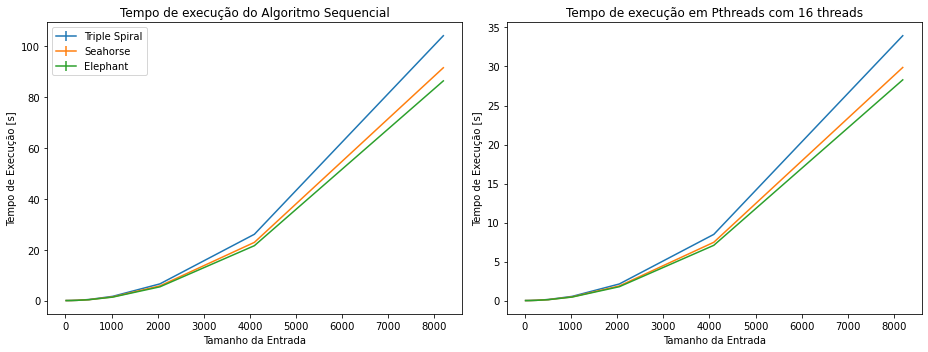

In [11]:
# Tempo sequencial sem io
fig, axes = plt.subplots(1,2,figsize=(13,5))
df_to_plot_mean = df_seq_sem_io.loc[(slice(None),slice(None)),'triple_spiral'].reset_index(level='Tamanho')
df_to_plot_var = df_seq_sem_io_var.loc[(slice(None),slice(None)),'triple_spiral'].reset_index(level='Tamanho')
axis_to_plot = 0
axes[axis_to_plot].errorbar(x=df_to_plot_mean['Tamanho'].values.flatten(), 
                            y=df_to_plot_mean['triple_spiral'].values.flatten(),
                            yerr=df_to_plot_var['triple_spiral'].values.flatten())

df_to_plot_mean = df_seq_sem_io.loc[(slice(None),slice(None)),'seahorse'].reset_index(level='Tamanho')
df_to_plot_var = df_seq_sem_io_var.loc[(slice(None),slice(None)),'seahorse'].reset_index(level='Tamanho')
axes[axis_to_plot].errorbar(x=df_to_plot_mean['Tamanho'].values.flatten(), 
                            y=df_to_plot_mean['seahorse'].values.flatten(),
                            yerr=df_to_plot_var['seahorse'].values.flatten())

df_to_plot_mean = df_seq_sem_io.loc[(slice(None),slice(None)),'elephant'].reset_index(level='Tamanho')
df_to_plot_var = df_seq_sem_io_var.loc[(slice(None),slice(None)),'elephant'].reset_index(level='Tamanho')
axes[axis_to_plot].errorbar(x=df_to_plot_mean['Tamanho'].values.flatten(), 
                            y=df_to_plot_mean['elephant'].values.flatten(),
                            yerr=df_to_plot_var['elephant'].values.flatten())

axes[axis_to_plot].set_xlabel('Tamanho da Entrada')
axes[axis_to_plot].set_ylabel('Tempo de Execução [s]')
axes[axis_to_plot].legend(['Triple Spiral','Seahorse', 'Elephant'])
axes[axis_to_plot].set_title('Tempo de execução do Algoritmo Sequencial')


# Tempo sequencial sem io
df_to_plot_mean = df_pth.loc[(16,slice(None)),'triple_spiral'].reset_index(level='Tamanho')
df_to_plot_var = df_pth_var.loc[(16,slice(None)),'triple_spiral'].reset_index(level='Tamanho')
axis_to_plot = 1
axes[axis_to_plot].errorbar(x=df_to_plot_mean['Tamanho'].values.flatten(), 
                            y=df_to_plot_mean['triple_spiral'].values.flatten(),
                            yerr=df_to_plot_var['triple_spiral'].values.flatten())

df_to_plot_mean = df_pth.loc[(16,slice(None)),'seahorse'].reset_index(level='Tamanho')
df_to_plot_var = df_pth_var.loc[(16,slice(None)),'seahorse'].reset_index(level='Tamanho')
axes[axis_to_plot].errorbar(x=df_to_plot_mean['Tamanho'].values.flatten(), 
                            y=df_to_plot_mean['seahorse'].values.flatten(),
                            yerr=df_to_plot_var['seahorse'].values.flatten())

df_to_plot_mean = df_pth.loc[(16,slice(None)),'elephant'].reset_index(level='Tamanho')
df_to_plot_var = df_pth_var.loc[(16,slice(None)),'elephant'].reset_index(level='Tamanho')
axes[axis_to_plot].errorbar(x=df_to_plot_mean['Tamanho'].values.flatten(), 
                            y=df_to_plot_mean['elephant'].values.flatten(),
                            yerr=df_to_plot_var['elephant'].values.flatten())

axes[axis_to_plot].set_xlabel('Tamanho da Entrada')
axes[axis_to_plot].set_ylabel('Tempo de Execução [s]')
# axes[axis_to_plot].legend(['seq','omp'])
axes[axis_to_plot].set_title('Tempo de execução em Pthreads com 16 threads')
fig.tight_layout()
plt.savefig('Variacao Tamanho Dados')

In [14]:
diff = df_omp.loc[(slice(None),8192),:]/df_pth.loc[(slice(None),8192),:]
dfi.export(
    diff,
    "diff_8192.png",
    table_conversion="matplotlib"
)
diff = df_omp.loc[(slice(None),2048),:]/df_pth.loc[(slice(None),2048),:]
dfi.export(
    diff,
    "diff_2048.png",
    table_conversion="matplotlib"
)
diff = df_omp.loc[(slice(None),4096),:]/df_pth.loc[(slice(None),4096),:]
dfi.export(
    diff,
    "diff_4096.png",
    table_conversion="matplotlib"
)
diff = df_omp.loc[(slice(None),1024),:]/df_pth.loc[(slice(None),1024),:]
dfi.export(
    diff,
    "diff_1024.png",
    table_conversion="matplotlib"
)
diff = df_omp.loc[(slice(None),256),:]/df_pth.loc[(slice(None),256),:]
dfi.export(
    diff,
    "diff_256.png",
    table_conversion="matplotlib"
)

findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.


In [18]:
df = df_pth.loc[(slice(None),8192),:]
dfi.export(
    df,
    "pth_8192_.png",
    table_conversion="matplotlib"
)

df = df_seq
dfi.export(
    df,
    "seq_tempos.png",
    table_conversion="matplotlib"
)

In [166]:
# Sem IO
df = seq_sem_io_data.loc[seq_sem_io_data.loc[:,'File']=='triple_spiral',['Tamanho','Tempo']].set_index('Tamanho')
df = df.reset_index()

try:
    del vetor
except:
    pass
for indx in df['Tamanho'].unique():
    data = df.loc[df['Tamanho']==indx]
    try:
        vetor[str(indx)] = data['Tempo'].values
    except:
        vetor = data.copy()
        vetor.columns = ['Tamanho',str(indx)]
df_sem_io = vetor.iloc[:,1:].copy()

# Com IO
df = seq_data.loc[seq_data.loc[:,'File']=='triple_spiral',['Tamanho','Tempo']].set_index('Tamanho')
df = df.reset_index()

try:
    del vetor
except:
    pass
for indx in df['Tamanho'].unique():
    data = df.loc[df['Tamanho']==indx]
    try:
        vetor[str(indx)] = data['Tempo'].values
    except:
        vetor = data.copy()
        vetor.columns = ['Tamanho',str(indx)]
df_com_io = vetor.iloc[:,1:].copy()

a = df_sem_io/df_sem_io.mean()
a['Tipo'] = 'Sem IO'
b = df_com_io/df_sem_io.mean()
b['Tipo'] = 'Com IO'
# fig, axes = plt.subplots(2,1,figsize=(8,10))
# a.plot(kind='box',ax=axes[0])
# b.plot(kind='box', ax=axes[0])
# plt.show()

In [247]:
df = seq_sem_io_data.loc[seq_sem_io_data.loc[:,'File']=='triple_spiral',['Tamanho','Tempo']].set_index('Tamanho').copy()
df['Tipo'] = 'Sem IO'
a = df.copy()
df = seq_data.loc[seq_data.loc[:,'File']=='triple_spiral',['Tamanho','Tempo']].set_index('Tamanho')
df['Tipo'] = 'Com IO'
a = a.append(df)
filt = a.copy()

for idx in a.index.unique():
    a.loc[(a.index==idx)& (a.loc[:,'Tipo']=='Sem IO'),'Tempo'] = a.loc[(a.index==idx)& (a.loc[:,'Tipo']=='Sem IO'),'Tempo']/a.loc[(a.index==idx)& (a.loc[:,'Tipo']=='Com IO'),'Tempo'].mean()
    a.loc[(a.index==idx)& (a.loc[:,'Tipo']=='Com IO'),'Tempo'] = a.loc[(a.index==idx)& (a.loc[:,'Tipo']=='Com IO'),'Tempo']/a.loc[(a.index==idx)& (a.loc[:,'Tipo']=='Com IO'),'Tempo'].mean()

filt = filt.loc[a.loc[:,'Tempo']<1.5,:]

a = filt.copy()
for idx in a.index.unique():
    a.loc[(a.index==idx)& (a.loc[:,'Tipo']=='Sem IO'),'Tempo'] = a.loc[(a.index==idx)& (a.loc[:,'Tipo']=='Sem IO'),'Tempo']/a.loc[(a.index==idx)& (a.loc[:,'Tipo']=='Com IO'),'Tempo'].mean()
    a.loc[(a.index==idx)& (a.loc[:,'Tipo']=='Com IO'),'Tempo'] = a.loc[(a.index==idx)& (a.loc[:,'Tipo']=='Com IO'),'Tempo']/a.loc[(a.index==idx)& (a.loc[:,'Tipo']=='Com IO'),'Tempo'].mean()
    
filt = filt.loc[a.loc[:,'Tempo']<1.2,:]

a = filt.copy()
for idx in a.index.unique():
    a.loc[(a.index==idx)& (a.loc[:,'Tipo']=='Sem IO'),'Tempo'] = a.loc[(a.index==idx)& (a.loc[:,'Tipo']=='Sem IO'),'Tempo']/a.loc[(a.index==idx)& (a.loc[:,'Tipo']=='Com IO'),'Tempo'].mean()
    a.loc[(a.index==idx)& (a.loc[:,'Tipo']=='Com IO'),'Tempo'] = a.loc[(a.index==idx)& (a.loc[:,'Tipo']=='Com IO'),'Tempo']/a.loc[(a.index==idx)& (a.loc[:,'Tipo']=='Com IO'),'Tempo'].mean()

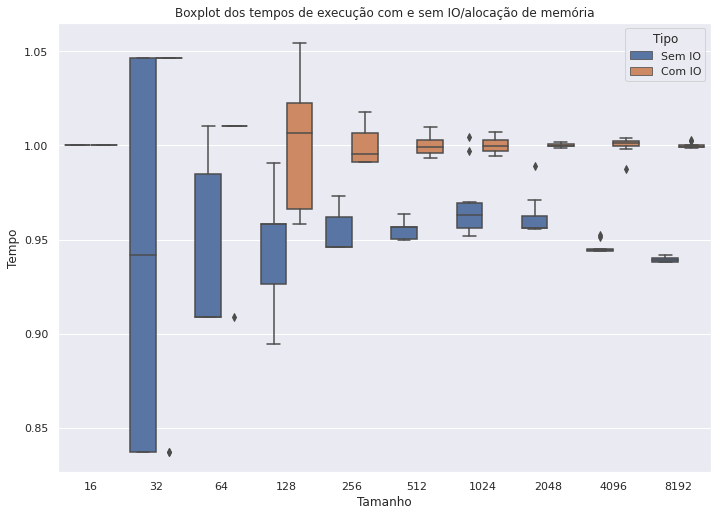

In [249]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.boxplot(data = a,x=a.index, y='Tempo',hue='Tipo')
plt.title('Boxplot dos tempos de execução com e sem IO/alocação de memória')
plt.savefig('boxplot')

In [246]:
a.loc[a.index==16,:]

,Tempo,Tipo
Tamanho,,
16,0.003,Sem IO
16,0.004,Sem IO
16,0.003,Sem IO
16,0.003,Sem IO
16,0.003,Sem IO
16,0.004,Sem IO
16,0.003,Sem IO
16,0.003,Sem IO
16,0.003,Sem IO


In [49]:
folder = pth_folder
for file in files:
    data = pd.read_csv(root+folder+file+".csv",names=["Num Threads","Tamanho","Tempo"])
    data['File'] = file
    try: 
        pth_data = pth_data.append(data)
    except:
        pth_data = data
        

0       16
1       16
2       16
3       16
4       16
      ... 
95    8192
96    8192
97    8192
98    8192
99    8192
Name: Tamanho, Length: 100, dtype: int64

In [45]:
seq_sem_io_data

,Num Threads,Tamanho,Tempo,File
0,1,16,0.003,elephant
1,1,16,0.003,elephant
2,1,16,0.003,elephant
3,1,16,0.003,elephant
4,1,16,0.004,elephant
...,...,...,...,...
95,1,8192,104.137,triple_spiral
96,1,8192,104.307,triple_spiral
97,1,8192,104.306,triple_spiral
98,1,8192,104.086,triple_spiral
